# Viral Propagation in a population

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
# Define constants, but we do it as a class (to later make passing it around easier)

class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_trials = 1
        self.n_animals = 200
        self.n_steps = 400
        self.speed = 0.01
        self.v_decay = 0.7
        self.arena_size = 5
        self.infect_dist = 0.1**2     # To avoid running np.sqrt() later

In [20]:
# Build the model
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))
    
    

    for i_trial in range(n_trials):
        
        stats = np.zeros(c.n_steps)
        
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        vx = np.zeros(c.n_animals)
        vy = np.zeros(c.n_animals)
        infected = np.zeros(c.n_animals)
        infected[0]= 1 #PATIENT ZERO :(
        
      

        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = np.random.randn(c.n_animals)*c.speed
            vy = np.random.randn(c.n_animals)*c.speed
            # Make them run around (keeps speed somewhat randomized)

            # Reflect from the walls
           # vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
           # vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))

            
            for i_animal in range(c.n_animals): # <---- This gains about a second of performance NEED FOR INFECTION 
                if infected[i_animal] ==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.infect_dist)
                    infected[victims] = 1
   

            stats[t] = np.sum(infected)/c.n_animals
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[infected == 0],y[infected==0],'k.',markersize = 5)
                plt.plot(x[infected == 1],y[infected==1],'r.',markersize = 5)
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
            else:
                print('.',end='')
        # --- Time loop is over

        history[:,i_trial] = stats
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


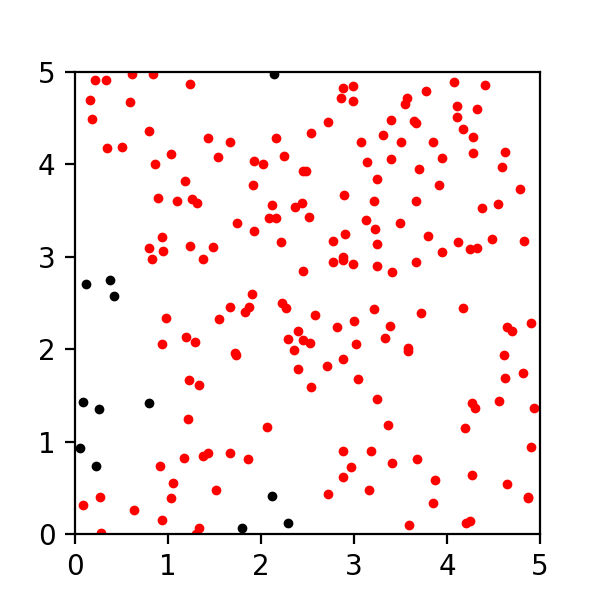

<IPython.core.display.Javascript object>

In [22]:
c = Const()
curve = model(c, show_dotses=True);
plt.figure(figsize=(3,3))
plt.plot(np.diff(curve))